# Autoencoder

<img src='https://i.pinimg.com/originals/3d/45/81/3d458124f354ed351bf40740c08a1446.png' width='700'>

(explanation)

## Import libraries

In [1]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


## Import Fashion MNIST dataset

In [2]:
(X_train, y_train), (X_valid, y_valid) = tf.keras.datasets.fashion_mnist.load_data()

- Checking dataset shape

In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_valid shape: {X_valid.shape}')
print(f'y_valid shape: {y_valid.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_valid shape: (10000, 28, 28)
y_valid shape: (10000,)


## Take a glance on dataset/ image

In [4]:
# take a look at some part of the data
X_train[0][7:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0]], dtype=uint8)

- It is a image datset, all data are in range 0 to 255. We can plot the dataset into image. Before that, we scale data from 0 to 1.

In [5]:
X_train = X_train.astype('float32')/ 255
X_valid = X_valid.astype('float32')/ 255

Target value: 0


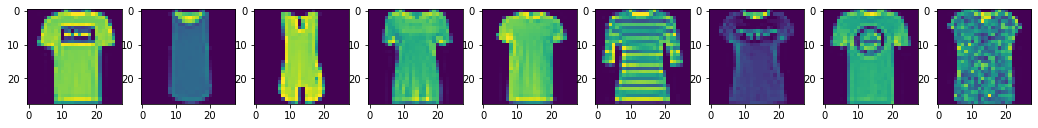

Target value: 1


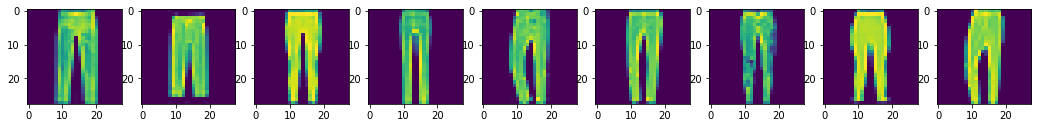

Target value: 2


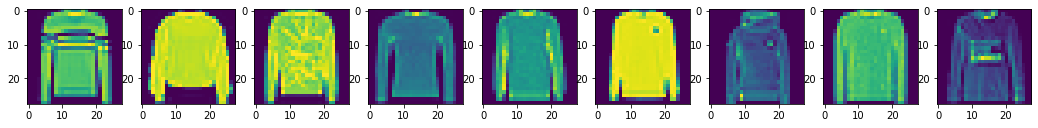

Target value: 3


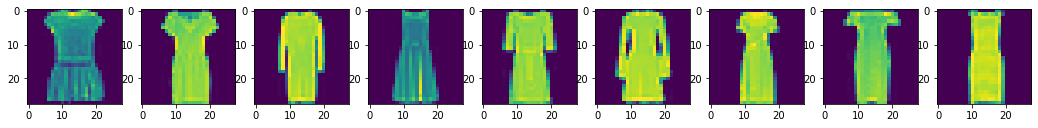

Target value: 4


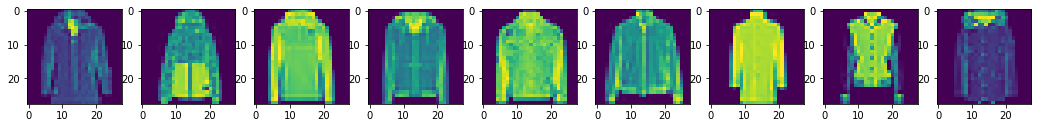

Target value: 5


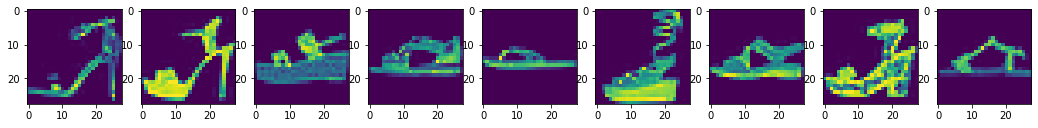

Target value: 6


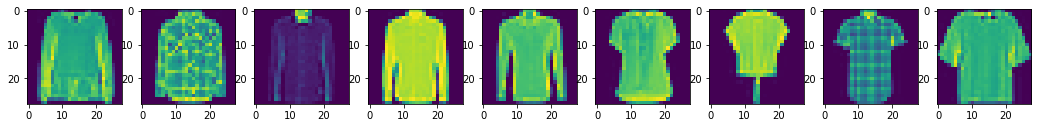

Target value: 7


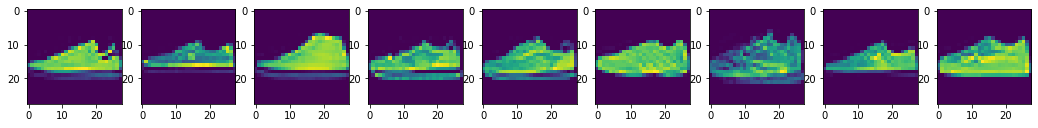

Target value: 8


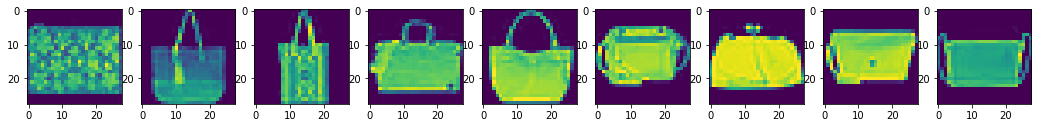

Target value: 9


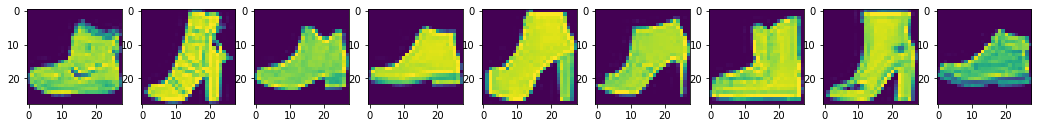

In [6]:
for idx in range(10):
    plt.figure(figsize=(18,4))
    for i in range(9):
        plt.subplot(191+i)
        plt.imshow(X_train[y_train==idx][i])
    print(f'Target value: {idx}')
    plt.show()

## Buidling Model

In [7]:
width = X_train.shape[1]
height = X_train.shape[2]

class AutoEncoder(Model):
    def __init__(self):
        super().__init__()
        
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(64, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(width * height, activation='sigmoid'),
            layers.Reshape((width, height))
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder = AutoEncoder()

In [8]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

hist = autoencoder.fit(X_train, X_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_valid, X_valid))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - val_loss: 0.0176
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0159 - val_loss: 0.0148
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0141 - val_loss: 0.0137
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0132 - val_loss: 0.0129
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0117 - val_loss: 0.0118
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0114 - val_loss: 0.0113
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.011

## Identify Losses

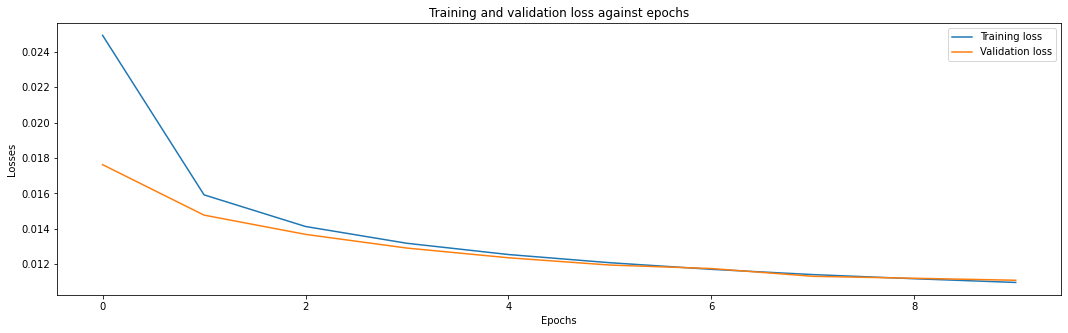

In [9]:
plt.figure(figsize=(18,5))
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Training and validation loss against epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')

plt.show()

## Reconstruct Image

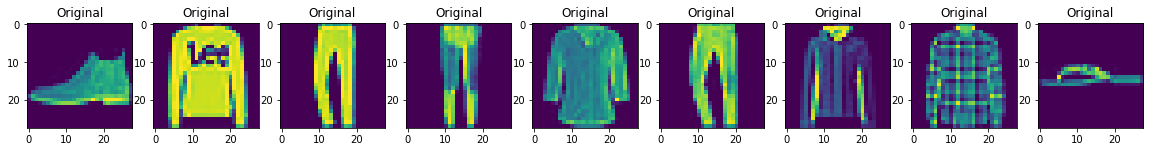

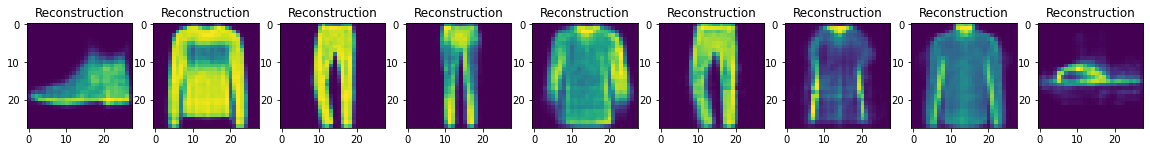

In [10]:
pred = autoencoder.predict(X_valid)

plt.figure(figsize=(20,5))
for i in range(9):
    plt.subplot(191 + i)
    plt.imshow(X_valid[i])
    plt.title('Original')
plt.show()

plt.figure(figsize=(20,5))
for i in range(9):
    plt.subplot(191 + i)
    plt.imshow(pred[i])
    plt.title('Reconstruction')
plt.show()

## Image Denoising

### - Add random noise to images

In [11]:
# reshape data
X_train_noise = X_train[..., tf.newaxis]
X_valid_noise = X_valid[..., tf.newaxis]
print(X_train_noise.shape)

(60000, 28, 28, 1)


In [12]:
noise_factor = 0.2

# add noise 
X_train_noisy = X_train_noise + noise_factor * tf.random.normal(shape=X_train_noise.shape)
X_valid_noisy = X_valid_noise + noise_factor * tf.random.normal(shape=X_valid_noise.shape)

X_train_noisy = tf.clip_by_value(X_train_noisy, clip_value_min=0., clip_value_max=1.)
X_valid_noisy = tf.clip_by_value(X_valid_noisy, clip_value_min=0., clip_value_max=1.)

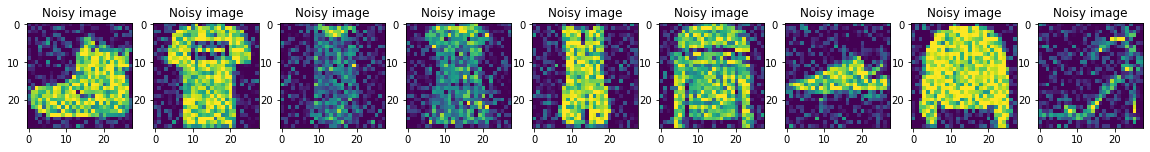

In [13]:
plt.figure(figsize=(20,5))
for i in range(9):
    plt.subplot(191 + i)
    plt.imshow(X_train_noisy[i])
    plt.title('Noisy image')
plt.show()

## Denoise Convolution Autoencoder Model

In [14]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(width, height, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

denoise = Denoise()

In [15]:
denoise.compile(optimizer='adam', loss=losses.MeanSquaredError())

hist_denoise = denoise.fit(X_train_noisy, X_train,
                    epochs=10,
                    shuffle=True,
                    validation_data=(X_valid_noisy, X_valid))

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0179 - val_loss: 0.0105
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0095 - val_loss: 0.0090
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 10/10
1875/1875 [==============================] - 39s 21m

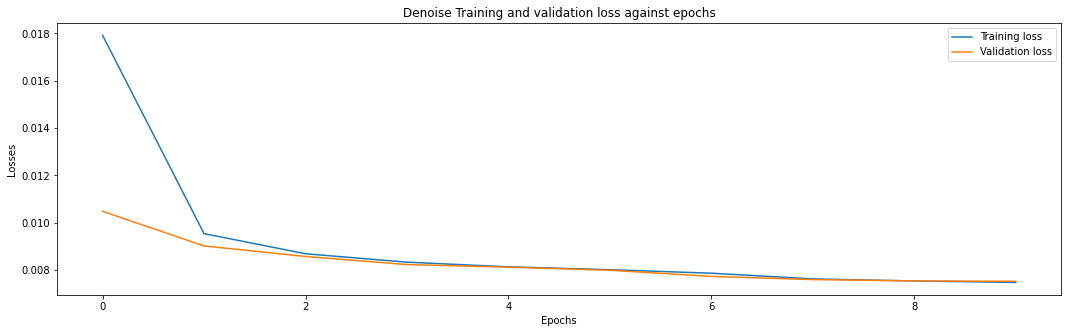

In [16]:
plt.figure(figsize=(18,5))
plt.plot(hist_denoise.history['loss'], label='Training loss')
plt.plot(hist_denoise.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Denoise Training and validation loss against epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')

plt.show()

In [17]:
denoise_pred = tf.squeeze(denoise.predict(X_valid_noisy))

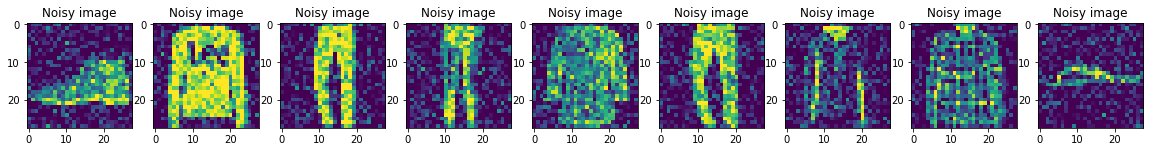

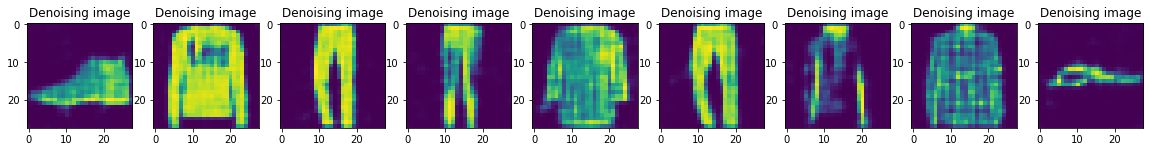

In [19]:
plt.figure(figsize=(20,5))
for i in range(9):
    plt.subplot(191 + i)
    plt.imshow(X_valid_noisy[i])
    plt.title('Noisy image')
plt.show()

plt.figure(figsize=(20,5))
for i in range(9):
    plt.subplot(191 + i)
    plt.imshow(denoise_pred[i])
    plt.title('Denoising image')
plt.show()